In [1]:
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marze\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marze\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\marze\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
# Import txt file

with open('20th_century_scrape.txt', 'r', errors='ignore') as file: 
   data = file.read().replace( '\n', ' ')

In [5]:
# Sentence tokenization

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent) 

['    Key events of the 20th century - Wikipedia                            Jump to content        Main menu      Main menu move to sidebar hide    \t\tNavigation \t   Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us      \t\tContribute \t   HelpLearn to editCommunity portalRecent changesUpload file                    Search            Search                       Appearance                 Donate  Create account  Log in         Personal tools      Donate Create account Log in      \t\tPages for logged out editors learn more    ContributionsTalk                             Contents move to sidebar hide     (Top)      1 Historic events in the 20th century     Toggle Historic events in the 20th century subsection      1.1 World at the beginning of the century       1.1.1 "The war to end all wars": World War I (1914â€“1918)         1.1.2 Russian Revolution and communism           1.2 Between the wars       1.2.1 Economic depression         1.2.2 The rise of dictators

### Tokenize the words from the text and create a bar chart to plot the 10 most common words.

In [8]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word)

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'Wikipedia', 'Jump', 'to', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'to', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Search', 'Search', 'Appearance', 'Donate', 'Create', 'account', 'Log', 'in', 'Personal', 'tools', 'Donate', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'more', 'ContributionsTalk', 'Contents', 'move', 'to', 'sidebar', 'hide', '(', 'Top', ')', '1', 'Historic', 'events', 'in', 'the', '20th', 'century', 'Toggle', 'Historic', 'events', 'in', 'the', '20th', 'century', 'subsection', '1.1', 'World', 'at', 'the', 'beginning', 'of', 'the', 'century', '1.1.1', '``', 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914â€', '“', '1918', ')', '1.1.2', 'Russian', 'Revolution', 'a

In [10]:
from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words) 

<FreqDist with 4797 samples and 21734 outcomes>


In [12]:
dist_words.most_common(10)

[('.', 1559),
 ('the', 1095),
 (',', 958),
 ('of', 606),
 ('and', 398),
 ('to', 324),
 ('The', 323),
 ('[', 300),
 (']', 300),
 ('in', 291)]

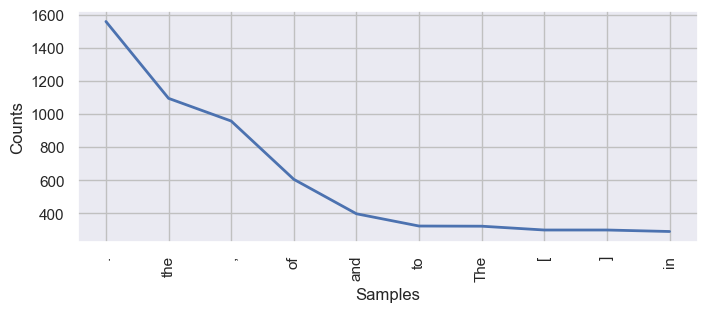

In [14]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

### Remove stop words (and punctuation marks if necessary), and rerun the plot

In [17]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'t', 'only', 'don', "isn't", "couldn't", 'where', 'about', 'that', "you'd", 'to', 'while', 'down', 'once', 'll', "doesn't", 'his', 'too', 'were', 'yourself', "shan't", 'very', 'ourselves', 'theirs', 'as', "should've", 'an', 'themselves', 'now', 'wouldn', 'for', 'she', 'their', 'there', 'any', "she's", 'just', 'over', 'own', 'will', 'me', 'so', "weren't", 'you', "that'll", 'be', 'your', 'is', 'off', 'has', "haven't", "needn't", 'needn', 'in', 'having', 'aren', 'him', 'isn', 'won', 'how', 'against', 'at', 'her', 'under', 'with', 'was', 'ain', 'then', 'it', 'had', 'i', 'its', 'same', 'which', 'or', 'above', 'doesn', 'doing', 'of', "mustn't", 'because', "aren't", 'what', "shouldn't", 'hadn', 'are', 'if', 'into', 's', 'being', 'these', 'weren', 're', "wasn't", 'am', 'until', 'when', 'o', 've', 'did', 'our', 'herself', 'all', 'through', 'he', 'but', 'during', "don't", 'ma', "you're", 'this', 'm', 'here', 'a', 'the', "won't", 'who', 'further', 'from', 'before', 'should', 'why', 'hers', 'most

In [19]:
# Removing stopwords in words

filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [21]:
filtered_words

['Key',
 'events',
 '20th',
 'century',
 '-',
 'Wikipedia',
 'Jump',
 'content',
 'Main',
 'menu',
 'Main',
 'menu',
 'move',
 'sidebar',
 'hide',
 'Navigation',
 'Main',
 'pageContentsCurrent',
 'eventsRandom',
 'articleAbout',
 'WikipediaContact',
 'us',
 'Contribute',
 'HelpLearn',
 'editCommunity',
 'portalRecent',
 'changesUpload',
 'file',
 'Search',
 'Search',
 'Appearance',
 'Donate',
 'Create',
 'account',
 'Log',
 'Personal',
 'tools',
 'Donate',
 'Create',
 'account',
 'Log',
 'Pages',
 'logged',
 'editors',
 'learn',
 'ContributionsTalk',
 'Contents',
 'move',
 'sidebar',
 'hide',
 '(',
 'Top',
 ')',
 '1',
 'Historic',
 'events',
 '20th',
 'century',
 'Toggle',
 'Historic',
 'events',
 '20th',
 'century',
 'subsection',
 '1.1',
 'World',
 'beginning',
 'century',
 '1.1.1',
 '``',
 'The',
 'war',
 'end',
 'wars',
 "''",
 ':',
 'World',
 'War',
 'I',
 '(',
 '1914â€',
 '“',
 '1918',
 ')',
 '1.1.2',
 'Russian',
 'Revolution',
 'communism',
 '1.2',
 'Between',
 'wars',
 '1.2.1',

In [23]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4694 samples and 17083 outcomes>


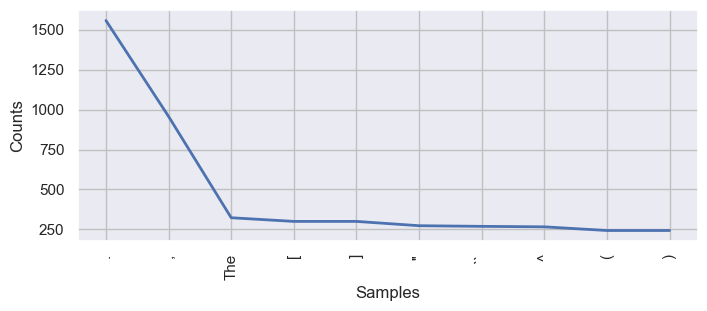

In [25]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter.plot(10, cumulative = False)
plt.show()

In [27]:
dist_words_filter

FreqDist({'.': 1559, ',': 958, 'The': 323, '[': 300, ']': 300, "''": 273, '``': 269, '^': 266, '(': 243, ')': 243, ...})

In [29]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [31]:
sans_punc

'  Key    events      th    century         Wikipedia    Jump    content    Main    menu    Main    menu    move    sidebar    hide    Navigation    Main    pageContentsCurrent    eventsRandom    articleAbout    WikipediaContact    us    Contribute    HelpLearn    editCommunity    portalRecent    changesUpload    file    Search    Search    Appearance    Donate    Create    account    Log    Personal    tools    Donate    Create    account    Log    Pages    logged    editors    learn    ContributionsTalk    Contents    move    sidebar    hide         Top              Historic    events      th    century    Toggle    Historic    events      th    century    subsection           World    beginning    century                   The    war    end    wars               World    War    I                                              Russian    Revolution    communism           Between    wars             Economic    depression             The    rise    dictatorship           Global    war  

In [33]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['Key', 'events', 'th', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Search', 'Search', 'Appearance', 'Donate', 'Create', 'account', 'Log', 'Personal', 'tools', 'Donate', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Historic', 'events', 'th', 'century', 'Toggle', 'Historic', 'events', 'th', 'century', 'subsection', 'World', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', '

In [35]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)

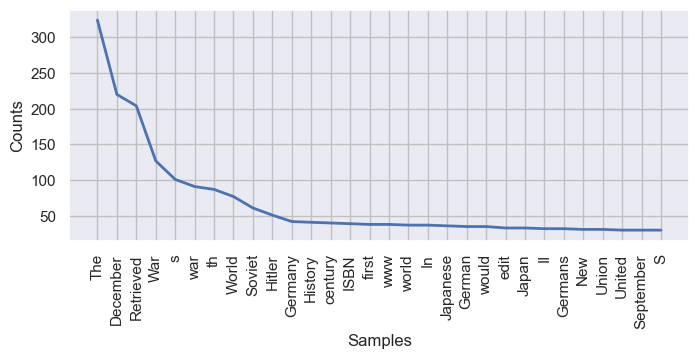

In [37]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(30, cumulative = False)
plt.show()

In [39]:
dist_words_filter_2.most_common(20)

[('The', 324),
 ('December', 220),
 ('Retrieved', 204),
 ('War', 127),
 ('s', 101),
 ('war', 91),
 ('th', 87),
 ('World', 77),
 ('Soviet', 61),
 ('Hitler', 51),
 ('Germany', 42),
 ('History', 41),
 ('century', 40),
 ('ISBN', 39),
 ('first', 38),
 ('www', 38),
 ('world', 37),
 ('In', 37),
 ('Japanese', 36),
 ('German', 35)]

While the first plot shows the most common words in the text, it might not reveal much about the key themes or important content because it is dominated by common stop words. The second plot provides a clearer understanding of the text's key topics and themes. It highlights important terms that are relevant to the text's subject matter, making it easier to analyze and comprehend the text's content. In summary, removing stop words and punctuation allows us to focus on the meaningful content of the text, providing clearer insights into the main topics and themes.

### Create a tags list using TextBlob

In [83]:
new_stopwords = ["And", "Then", 'n', 't', 's','th','In', 'The', 'll', 'S', 'www']

In [85]:
filtered = []
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered.append(word)

In [87]:
%%time
text = TextBlob(str(filtered))

CPU times: total: 0 ns
Wall time: 12.9 ms


In [89]:
text

TextBlob("['Key', 'events', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Search', 'Search', 'Appearance', 'Donate', 'Create', 'account', 'Log', 'Personal', 'tools', 'Donate', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Historic', 'events', 'century', 'Toggle', 'Historic', 'events', 'century', 'subsection', 'World', 'beginning', 'century', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'war', 'Pacif

In [91]:
tags_list = text.tags

In [92]:
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'Wikipedia", 'NNP'),
 ("'", 'POS'),
 ("'Jump", 'NNP'),
 ("'", 'POS'),
 ("'content", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'move", 'NNP'),
 ("'", 'POS'),
 ("'sidebar", 'NNP'),
 ("'", 'POS'),
 ("'hide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'us", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'file", 'IN'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Appearance", 'NN'),
 ("'Donate", 'NNP'),
 ("'", 'POS'),
 ("'Create", 'NNP'),
 ("'", 'POS'),
 ("'account", 'NNP'),
 ("'", 'POS'),
 ("'Log", 'NNP'),
 ("'", 'POS')

In [95]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]

In [97]:
df_text.head()

,Words,Word type
0,[,JJ
1,'Key,NNP
2,',POS
3,'events,NNS
4,',POS


### Create a list of the Top 10 POS tags for words that appear in the article

In [100]:
df_t = df_text.groupby('Word type').count().reset_index()

In [102]:
df_t.head()

,Word type,Words
0,CC,1
1,CD,75
2,DT,12
3,EX,12
4,FW,43


In [104]:
top10 = df_t.nlargest(10, 'Words')

In [106]:
top10

,Word type,Words
13,POS,6787
11,NNP,5489
12,NNS,1045
16,VBD,845
10,NN,387
17,VBG,319
6,JJ,285
5,IN,155
15,RB,141
1,CD,75


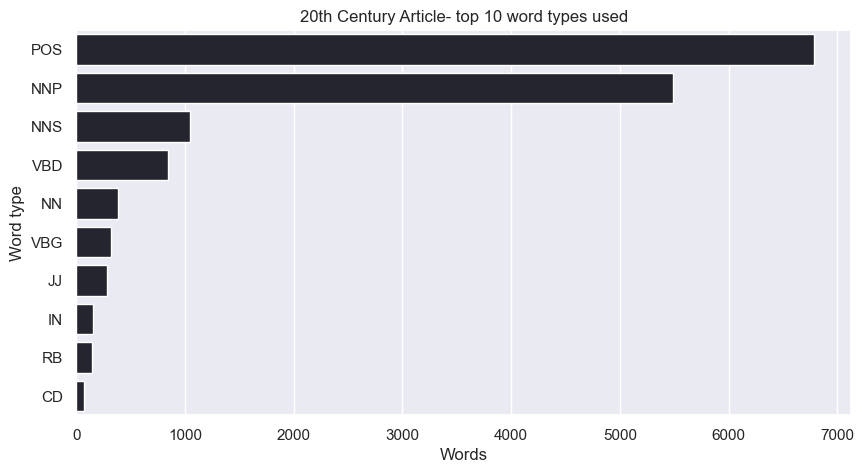

In [108]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top10).set_title("20th Century Article- top 10 word types used")

### Create three bar plots with the top 15 POS labels—one each for nouns, verbs, and adjectives

#### Nouns

In [112]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15_nouns = y.nlargest(15, 'Occurences')

In [116]:
top15_nouns

,Word,Occurences
295,'December,220
1259,'War,127
2572,'war,91
1305,'World,77
1106,'Soviet,61
539,'Hitler,51
538,'History,41
1493,'century,40
561,'ISBN,39
1777,'first,38


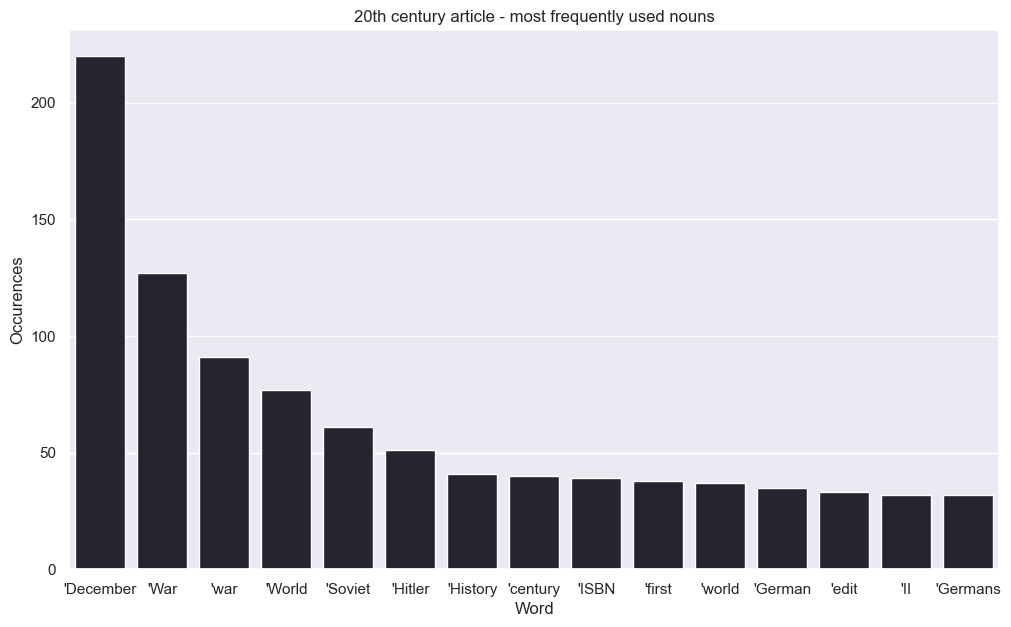

In [120]:
plt.figure(figsize=(12, 7))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data = top15_nouns).set_title("20th century article - most frequently used nouns")

#### Verbs

In [123]:
df = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15_verb = y.nlargest(15, 'Occurences')

In [125]:
top15_verb

,Word,Occurences
26,'Retrieved,204
35,'United,30
0,'Allied,19
192,'led,15
313,'used,13
190,'launched,12
1,'Archived,10
91,'controlled,9
158,'forced,8
297,'surrendered,7


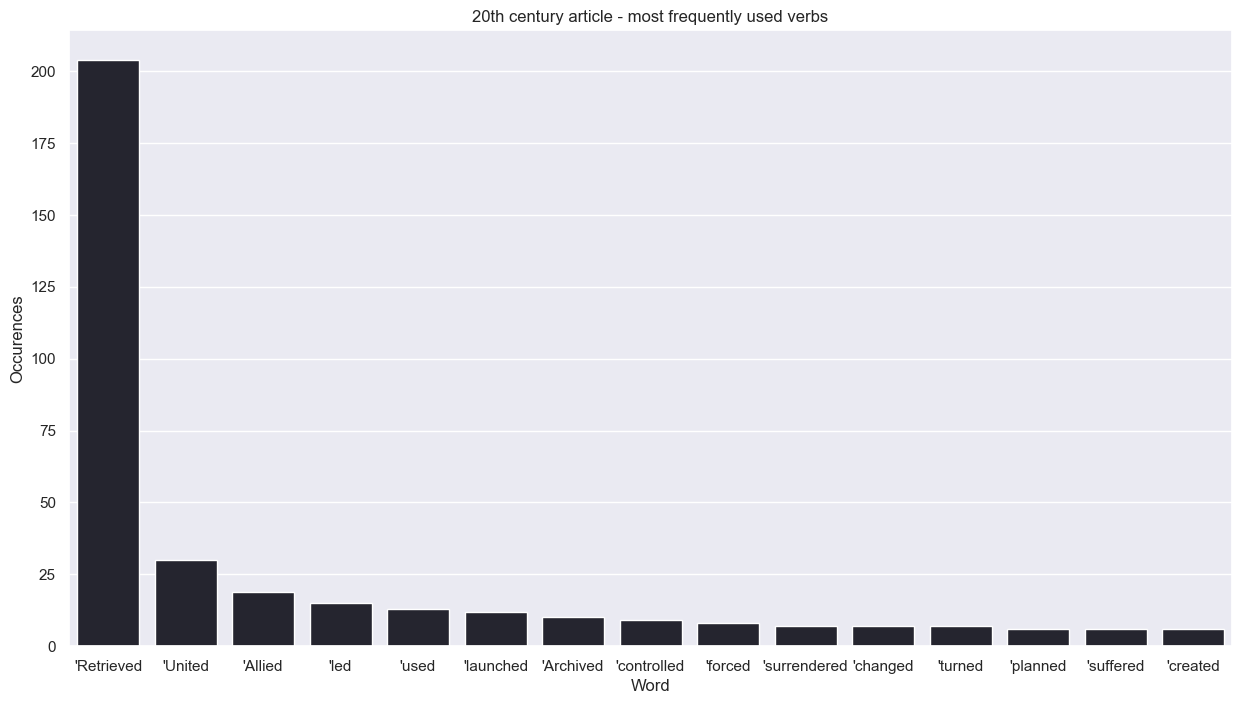

In [127]:
plt.figure(figsize=(15, 8))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data = top15_verb).set_title("20th century article - most frequently used verbs")

#### Adjectives

In [130]:
df = df_text[df_text['Word type'] == "JJ"]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top15_adj = y.nlargest(15, 'Occurences')

In [132]:
top15_adj

,Word,Occurences
27,'Japanese,36
2,'American,24
5,'Atlantic,13
19,'Guardian,10
13,'Chinese,7
42,'Russian,7
1,'African,6
103,'political,6
104,'possible,5
7,'Baltic,5


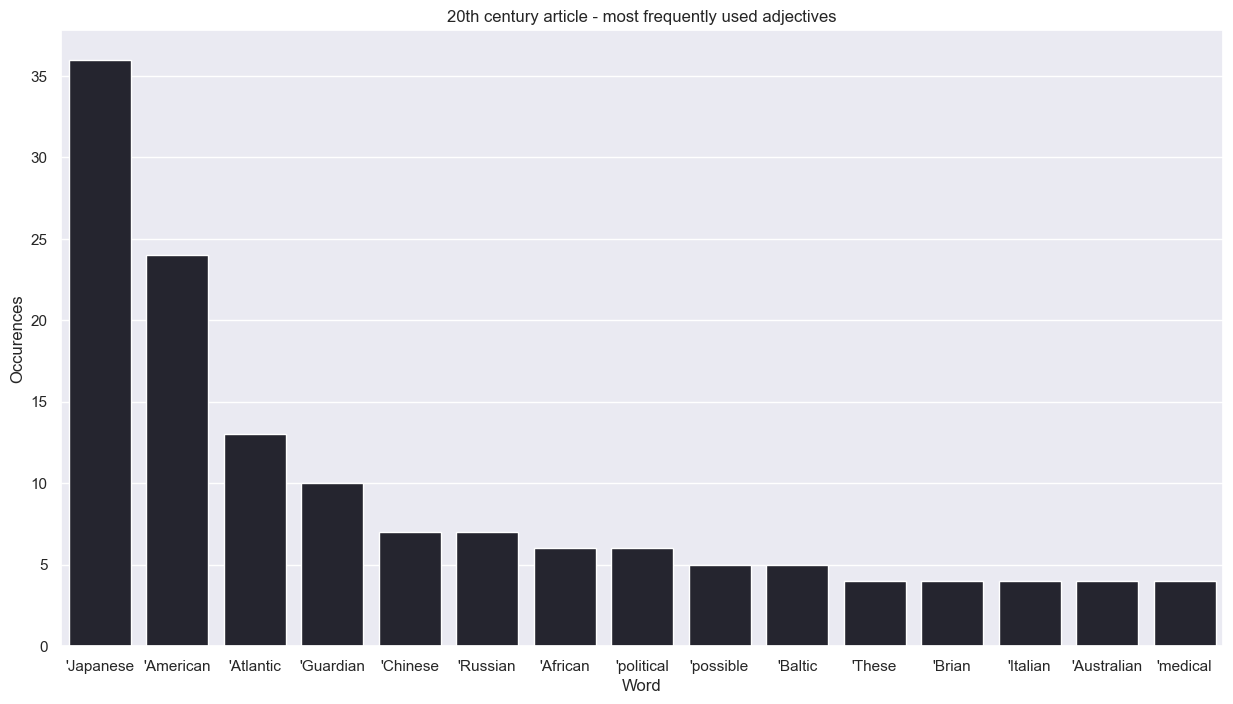

In [134]:
plt.figure(figsize=(15, 8))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data=top15_adj).set_title("20th century article - most frequently used adjectives")

Adjectives: The most common adjective is "Japanese," which suggests a significant focus on Japan or Japanese-related topics in the article. Other frequent adjectives like "American," "Atlantic," "Chinese," "Russian," hint at an international or geopolitical theme.

Verbs: The verb "Retrieved" stands out with a high frequency, which might indicate a lot of references or citations in the article. Verbs like "United," "Allied," and "led" suggest action and historical events, possibly related to conflicts or movements.

Nouns: "December" is the most frequent noun, implying that the article discusses events or topics heavily associated with that month. Words like "War," "year," "World," "Soviet," and "Hitler" suggest that the article might be related to historical events, particularly World War II.

#### Create a dataframe with the countries and the number of times they’re mentioned in your text

In [138]:
listToStr = ' '.join([str(elem) for elem in filtered])
 
print(listToStr)

Key events century Wikipedia Jump content Main menu Main menu move sidebar hide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us Contribute HelpLearn editCommunity portalRecent changesUpload file Search Search Appearance Donate Create account Log Personal tools Donate Create account Log Pages logged editors learn ContributionsTalk Contents move sidebar hide Top Historic events century Toggle Historic events century subsection World beginning century war end wars World War I Russian Revolution communism Between wars Economic depression rise dictatorship Global war World War II war Europe Blitzkrieg Operation Barbarossa Turning tides Operation Overlord Final days war Pacific Background Japanese Expansion Allied offensive Final days Holocaust Nuclear Age begins post war world end empires decolonization Cold War War proxy space race end Cold War Information communications technology world end century See also References Sources External links Toggle table c

In [163]:
# Create a count for countries

all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [165]:
all_counts

Counter({'December': 220,
         'Retrieved': 204,
         'War': 127,
         'war': 91,
         'World': 77,
         'Soviet': 61,
         'Hitler': 51,
         'Germany': 42,
         'History': 41,
         'century': 40,
         'ISBN': 39,
         'first': 38,
         'world': 37,
         'Japanese': 36,
         'German': 35,
         'would': 35,
         'edit': 33,
         'Japan': 33,
         'II': 32,
         'Germans': 32,
         'New': 31,
         'Union': 31,
         'United': 30,
         'September': 30,
         'ISSN': 30,
         'also': 29,
         'Europe': 28,
         'July': 28,
         'became': 27,
         'A': 27,
         'com': 27,
         'U': 26,
         'States': 26,
         'nuclear': 26,
         'end': 25,
         'August': 25,
         'June': 25,
         'Battle': 25,
         'history': 24,
         'American': 24,
         'weapons': 24,
         'October': 24,
         'This': 23,
         'attack': 23,
         'Main

In [184]:
# Read CSV file and skip initial spaces in the columns
countries = pd.read_csv('countries_list_20th_century_1.5.csv', index_col = 0, skipinitialspace=True)

# Strip leading and trailing spaces from a specific column
countries['country_name'] = countries['country_name'].str.strip()

In [186]:
countries

,country_name
1,Afghanistan
2,Albania
3,Algeria
4,Andorra
5,Angola
...,...
205,Sahrawi Arab Democratic Republic
206,Somaliland
207,South Ossetia
208,Taiwan


In [188]:
country_list = countries['country_name'].to_list()

In [190]:
country_list

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 "China, People's Republic of",
 'Colombia',
 'Comoros',
 'Congo, Democratic Republic of the',
 'Congo, Republic of the',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'G

In [192]:
dict_of_counts = {d : all_counts[d] for d in country_list}

In [194]:
dict_of_counts

{'Afghanistan': 1,
 'Albania': 2,
 'Algeria': 1,
 'Andorra': 0,
 'Angola': 1,
 'Antigua and Barbuda': 0,
 'Argentina': 0,
 'Armenia': 0,
 'Australia': 2,
 'Austria': 5,
 'Azerbaijan': 0,
 'Bahamas, The': 0,
 'Bahrain': 0,
 'Bangladesh': 2,
 'Barbados': 0,
 'Belarus': 1,
 'Belgium': 2,
 'Belize': 0,
 'Benin': 0,
 'Bhutan': 0,
 'Bolivia': 0,
 'Bosnia and Herzegovina': 0,
 'Botswana': 0,
 'Brazil': 0,
 'Brunei': 0,
 'Bulgaria': 1,
 'Burkina Faso': 0,
 'Burundi': 0,
 'Cambodia': 2,
 'Cameroon': 0,
 'Canada': 2,
 'Cape Verde': 0,
 'Central African Republic': 0,
 'Chad': 0,
 'Chile': 0,
 "China, People's Republic of": 0,
 'Colombia': 0,
 'Comoros': 0,
 'Congo, Democratic Republic of the': 0,
 'Congo, Republic of the': 0,
 'Costa Rica': 0,
 'Croatia': 0,
 'Cuba': 3,
 'Cyprus': 0,
 'Czech Republic': 0,
 'Denmark': 3,
 'Djibouti': 0,
 'Dominica': 0,
 'Dominican Republic': 0,
 'East Timor': 0,
 'Ecuador': 0,
 'Egypt': 2,
 'El Salvador': 0,
 'Equatorial Guinea': 0,
 'Eritrea': 0,
 'Estonia': 2,
 

In [196]:
# Search for the names from the list in the dictionary

dct = {v:[k] for v,k in dict_of_counts.items()}  
df = pd.DataFrame(dct)

In [198]:
df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Donetsk People's Republic,Kosovo,Luhansk People's Republic,Niue,Northern Cyprus,Sahrawi Arab Democratic Republic,Somaliland,South Ossetia,Taiwan,Transnistria
0,1,2,1,0,1,0,0,0,2,5,...,0,0,0,0,0,0,0,0,0,0


In [201]:
df = df.transpose().reset_index()

In [203]:
df.dtypes

index    object
0         int64
dtype: object

In [205]:
df

,index,0
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
203,Sahrawi Arab Democratic Republic,0
204,Somaliland,0
205,South Ossetia,0
206,Taiwan,0


In [207]:
df.rename(columns = {"index":"Country", 0:"Times mentioned"}, inplace = True)

In [209]:
df

,Country,Times mentioned
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
203,Sahrawi Arab Democratic Republic,0
204,Somaliland,0
205,South Ossetia,0
206,Taiwan,0


In [211]:
df.shape

(208, 2)

### Create a plot showing the frequency of the number of times these countries are mentioned in the text.

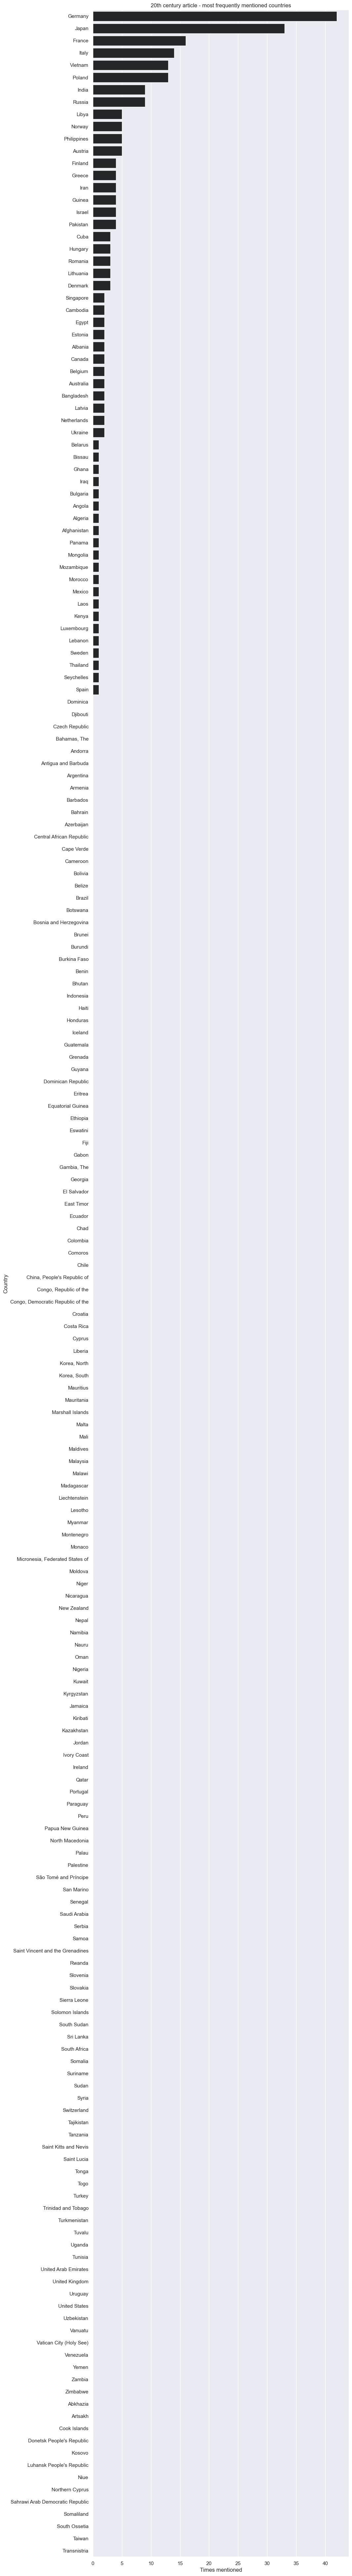

In [214]:
plt.figure(figsize=(10, 100))
with sns.dark_palette("#79C", 27):
    sns.barplot(x = "Times mentioned", y = "Country",
    saturation=0.9, data = df.sort_values("Times mentioned", ascending = False)).set_title("20th century article - most frequently mentioned countries")

Germany and Japan are the most frequently mentioned countries, with Germany being mentioned the most. This suggests that these countries were heavily involved or discussed in this article. The presence of countries like France, Italy, Russia, and Vietnam which indicates heavy discussion of wars that happened during that time (World War II and Vietnam War)